In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
# Load datasets efficiently
orders_df = pd.read_csv("List_of_Orders_55FFC79CF8.csv")
order_details_df = pd.read_csv("Order_Details_19795F61CF.csv")
sales_target_df = pd.read_csv("Sales_target_DD2E9B96A0.csv")


In [4]:
# Preview data
display(orders_df.head(), order_details_df.head(), sales_target_df.head())

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [5]:
# Merge order details with orders for a unified dataset
merged_df = order_details_df.merge(orders_df, on="Order ID")
display(merged_df.head())


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [6]:
# Sales and Profitability Analysis
category_metrics = merged_df.groupby("Category").agg(
    Total_Sales=('Amount', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Avg_Profit_per_Order=('Profit', 'mean')
).reset_index()
category_metrics["Profit_Margin_%"] = (category_metrics["Total_Profit"] / category_metrics["Total_Sales"]) * 100
display(category_metrics)

,Category,Total_Sales,Total_Profit,Avg_Profit_per_Order,Profit_Margin_%
0,Clothing,139054.0,11163.0,11.762908,8.027817
1,Electronics,165267.0,10494.0,34.071429,6.349725
2,Furniture,127181.0,2298.0,9.456790,1.806874


In [7]:
# Identify top and underperforming categories
top_performing = category_metrics.nlargest(3, "Profit_Margin_%")
underperforming = category_metrics.nsmallest(3, "Profit_Margin_%")
display(top_performing, underperforming)

,Category,Total_Sales,Total_Profit,Avg_Profit_per_Order,Profit_Margin_%
0,Clothing,139054.0,11163.0,11.762908,8.027817
1,Electronics,165267.0,10494.0,34.071429,6.349725
2,Furniture,127181.0,2298.0,9.456790,1.806874


,Category,Total_Sales,Total_Profit,Avg_Profit_per_Order,Profit_Margin_%
2,Furniture,127181.0,2298.0,9.456790,1.806874
1,Electronics,165267.0,10494.0,34.071429,6.349725
0,Clothing,139054.0,11163.0,11.762908,8.027817


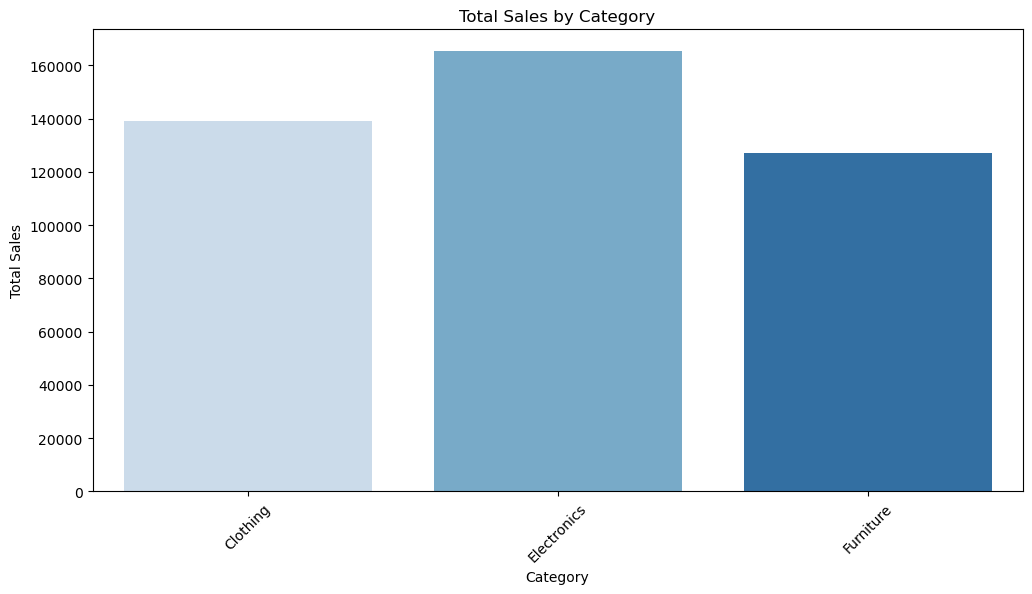

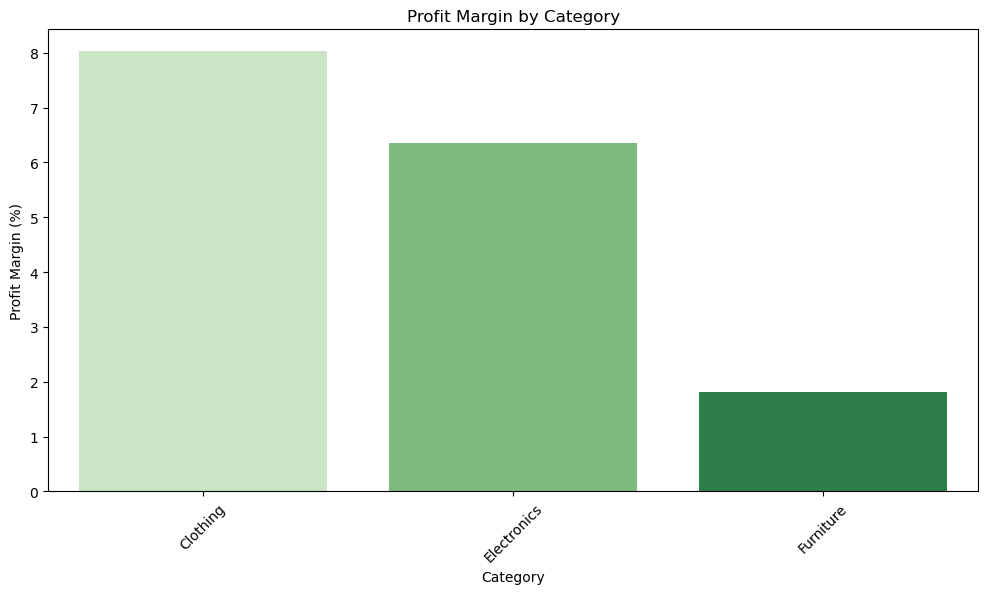

In [8]:
# Bar Chart for Sales & Profit Analysis
plt.figure(figsize=(12,6))
sns.barplot(data=category_metrics, x="Category", y="Total_Sales", palette="Blues", errorbar=None)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=category_metrics, x="Category", y="Profit_Margin_%", palette="Greens", errorbar=None)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.title("Profit Margin by Category")
plt.show()

In [9]:
# Target Achievement Analysis
sales_target_df["Month"] = pd.to_datetime(sales_target_df["Month of Order Date"], format="%b-%y")
sales_target_df.sort_values("Month", inplace=True)
sales_target_df["Target_Change_%"] = sales_target_df["Target"].pct_change() * 100
display(sales_target_df)

,Month of Order Date,Category,Target,Month,Target_Change_%
0,Apr-18,Furniture,10400.0,2018-04-01,NaN
24,Apr-18,Electronics,9000.0,2018-04-01,-13.461538
12,Apr-18,Clothing,12000.0,2018-04-01,33.333333
1,May-18,Furniture,10500.0,2018-05-01,-12.500000
25,May-18,Electronics,9000.0,2018-05-01,-14.285714
13,May-18,Clothing,12000.0,2018-05-01,33.333333
2,Jun-18,Furniture,10600.0,2018-06-01,-11.666667
26,Jun-18,Electronics,9000.0,2018-06-01,-15.094340
14,Jun-18,Clothing,12000.0,2018-06-01,33.333333
3,Jul-18,Furniture,10800.0,2018-07-01,-10.000000


In [10]:
# Identify significant target fluctuations
significant_changes = sales_target_df[sales_target_df["Target_Change_%"].abs() > 5]
display(significant_changes)


,Month of Order Date,Category,Target,Month,Target_Change_%
24,Apr-18,Electronics,9000.0,2018-04-01,-13.461538
12,Apr-18,Clothing,12000.0,2018-04-01,33.333333
1,May-18,Furniture,10500.0,2018-05-01,-12.500000
25,May-18,Electronics,9000.0,2018-05-01,-14.285714
13,May-18,Clothing,12000.0,2018-05-01,33.333333
2,Jun-18,Furniture,10600.0,2018-06-01,-11.666667
26,Jun-18,Electronics,9000.0,2018-06-01,-15.094340
14,Jun-18,Clothing,12000.0,2018-06-01,33.333333
3,Jul-18,Furniture,10800.0,2018-07-01,-10.000000
27,Jul-18,Electronics,9000.0,2018-07-01,-16.666667


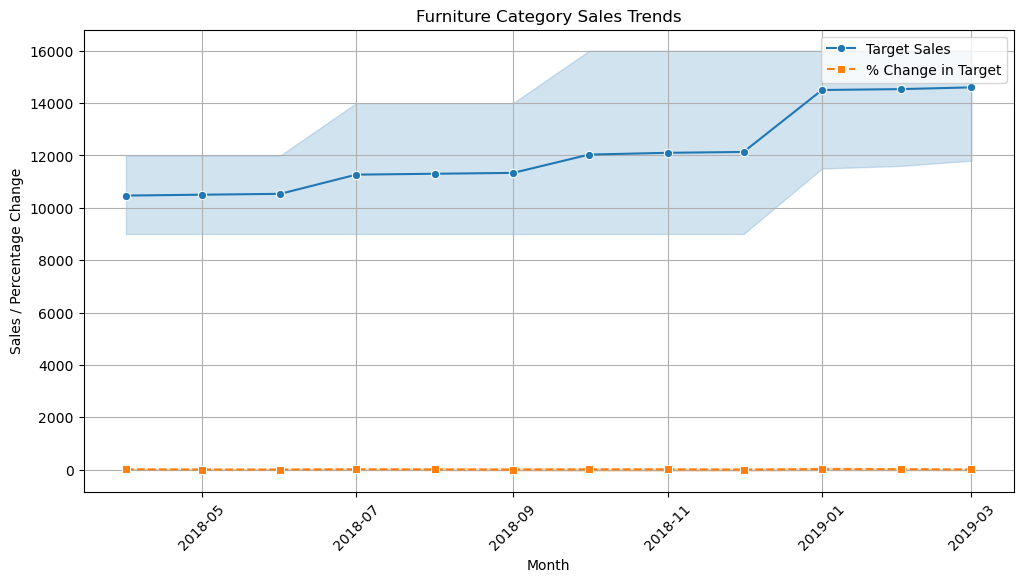

In [11]:
# Visualization of Target Trends
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_target_df, x="Month", y="Target", marker="o", label="Target Sales")
sns.lineplot(data=sales_target_df, x="Month", y="Target_Change_%", marker="s", label="% Change in Target", linestyle='dashed')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Sales / Percentage Change")
plt.title("Furniture Category Sales Trends")
plt.legend()
plt.grid()
plt.show()


In [12]:
# Regional Performance Insights
state_metrics = merged_df.groupby("State").agg(
    Order_Count=('State', 'size'),
    Total_Sales=('Amount', 'sum'),
    Avg_Profit=('Profit', 'mean')
).reset_index()
top_states = state_metrics.nlargest(5, "Order_Count")
display(top_states)


,State,Order_Count,Total_Sales,Avg_Profit
10,Madhya Pradesh,340,105140.0,16.326471
11,Maharashtra,290,95348.0,21.296552
4,Gujarat,87,21058.0,5.344828
2,Delhi,74,22531.0,40.364865
14,Rajasthan,74,21149.0,16.986486


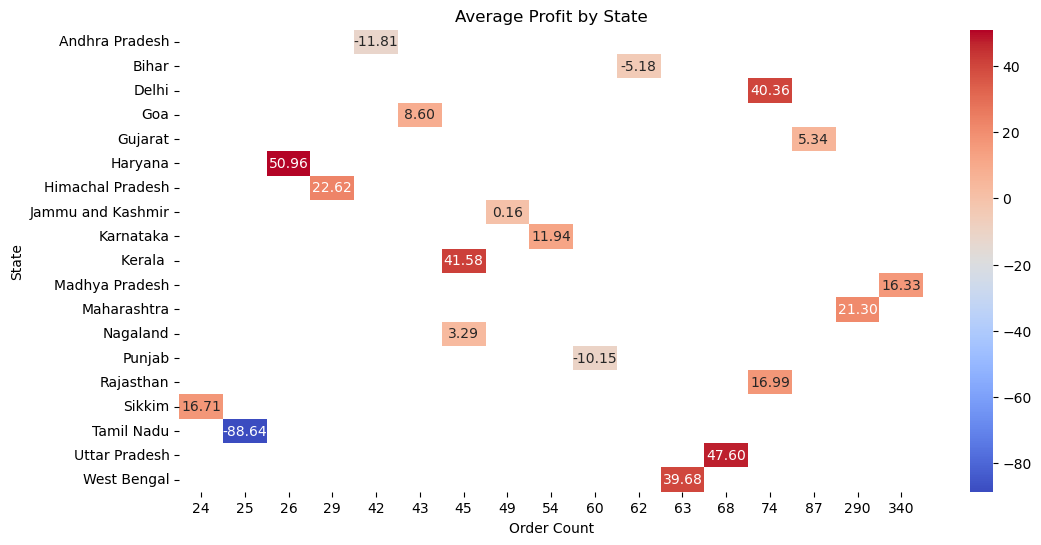

In [13]:
# Heatmap for Profit Margins by Region
plt.figure(figsize=(12,6))
state_pivot = state_metrics.pivot(index="State", columns="Order_Count", values="Avg_Profit")
sns.heatmap(state_pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.xlabel("Order Count")
plt.ylabel("State")
plt.title("Average Profit by State")
plt.show()
